    1  0  0.1  1.1  0.2  0.3  1.2  1.3  1.4  1.5  0.4  0.5  4  0.6  0.7  1.6  \
0   1  0    0    1    0    0    0    1    1    1    0    0  4    1    0    1   
1   0  0    1    0    0    1    1    1    1    0    0    1  0    1    0    0   
2   1  0    0    1    0    0    1    1    1    1    0    0  4    0    0    1   
3   1  0    0    1    0    0    1    1    1    1    0    0  4    1    0    1   
4   1  0    0    1    0    0    0    1    1    1    0    0  4    1    0    1   
.. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ..  ...  ...  ...   
95  1  0    0    1    0    0    0    1    1    1    0    0  2    1    0    1   
96  1  0    1    0    1    0    0    0    0    1    1    0  6    0    0    0   
97  1  0    0    1    0    0    1    1    1    1    0    0  4    1    0    1   
98  0  0    1    0    0    0    0    0    0    1    0    0  0    0    0    0   
99  0  1    1    0    1    0    0    0    1    1    0    0  2    1    0    0   

    1.7  
0     1  
1     4  
2     1  

/home/oppslab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


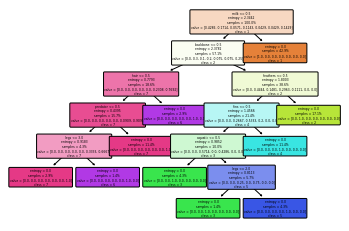

In [20]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

#reading dataset
data = pd.read_csv ('zoo_data.csv')
print(data)

#adding header
headerList=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
data.to_csv('zoo_data2.csv',header=headerList,index=False)
dataset=pd.read_csv('zoo_data2.csv')
print(dataset.head())
df=dataset.copy()
df=df.drop('type',axis=1)

#splitting dataset into train and test
X=dataset.values[:,0:16]
Y=dataset.values[:,16]
print(X)
print(Y)

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

#training the model using DecisionTreeClassifier
clf_entropy=DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf_entropy.fit(X_train,y_train)

#Predicting the test data
y_pred_en=clf_entropy.predict(X_test)
print(y_pred_en)

#Calculating accuracy,confusion matrix,classification report
print("Accuracy is :",accuracy_score(y_test,y_pred_en))
print("Confusion matrix is : ",confusion_matrix(y_test,y_pred_en))
print("Classification report is : ",classification_report(y_test,y_pred_en))

#Plotting tree
dec_tree = plot_tree(decision_tree=clf_entropy, feature_names = df.columns, 
                     class_names =["1","2","3","4","5","6","7"],filled = True , precision = 4, rounded = True,proportion=True,fontsize=3)